# **Capstone project: Providing data-driven suggestions for HR**

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

#### Plan stage consideration
For this project the stakeholders are the data team and the Human ressources team.
We are going to build a regression model for understand why the employee leave the company and to help the company improve their employee retention rates.
Most of the column are numerical and there all concern the employee environment within the company.
An important ethical consideration is that a part of the data is derived from surveys, which may not be fully completed by all employees.

## Step 1. Imports




In [1]:
# Import packages
#Basic and visulizations packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Import pickle for save model
import pickle

#Import for data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#For evaluation 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree


### Load dataset


In [2]:
# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)




### Gather basic information about the data

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
# Gather descriptive statistics about the data
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Rename columns as needed
df0 = df0.rename(columns = {'average_montly_hours': 'average_monthly_hour',
                           'time_spend_company': 'time_at_company', 
                           'Work_accident': 'work_accident',
                           'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hour', 'time_at_company', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

In [7]:
# Check for missing values
df0.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hour     0
time_at_company          0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Check duplicates

In [8]:
# Check for duplicates
df0.duplicated().sum()

3008

In [9]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hour,time_at_company,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df0.drop_duplicates(keep = 'first')

# Display first few rows of new dataframe as needed
df1.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hour,time_at_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

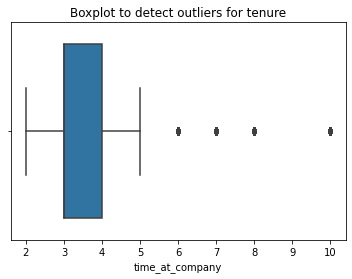

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(x = df1['time_at_company'])
plt.title('Boxplot to detect outliers for tenure')
plt.show()

In [12]:
# Determine the number of rows containing outliers
q1 = df1['time_at_company'].quantile(0.25)
q3 = df1['time_at_company'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr
outliers = df1[(df1['time_at_company'] > upper_limit) | (df1['time_at_company'] < lower_limit)]
print("Number of rows in the data containing outliers in `time_at_company`:", len(outliers))

Number of rows in the data containing outliers in `time_at_company`: 824


# pAce: Analyze Stage




## Step 2. Data Exploration (Continue EDA)



In [13]:
# Get numbers of people who left vs. stayed
print(df1['left'].value_counts())
print()
# Get percentages of people who left vs. stayed
print(df1['left'].value_counts(normalize = True))

0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64


### Data visualizations

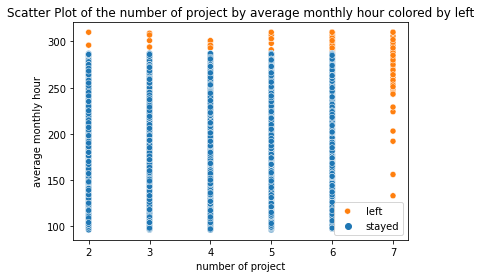

In [14]:
# Scatter Plot of the number of project by average monthly hour colored by left
sns.scatterplot(x=df1['number_project'], y=df1['average_monthly_hour'],
                hue=df1['left'], data=df1)
plt.title('Scatter Plot of the number of project by average monthly hour colored by left')
plt.xlabel('number of project')
plt.ylabel('average monthly hour')
plt.legend(labels=['left', 'stayed'])
plt.show()

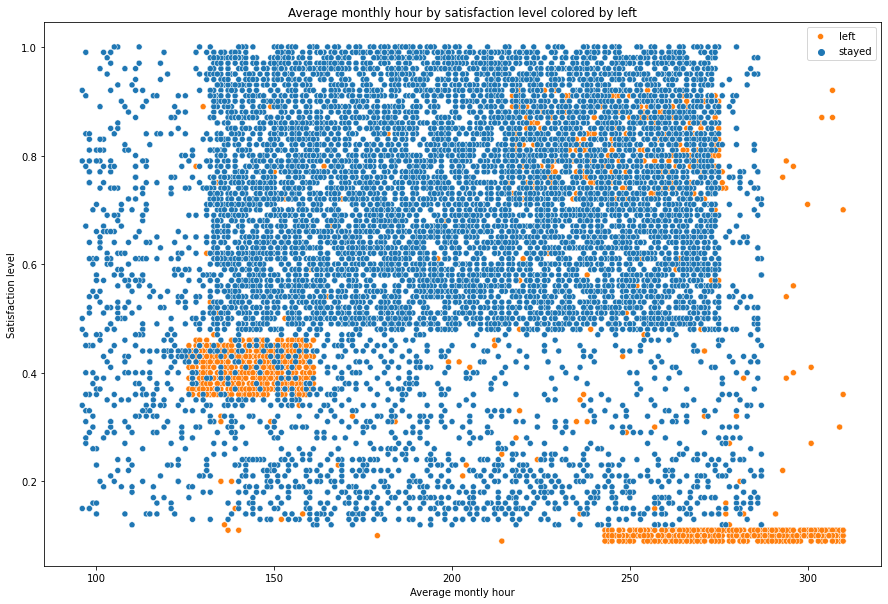

In [15]:
# Average monthly hour by satisfaction level colored by left
plt.figure(figsize = (15, 10))
sns.scatterplot(x=df1['average_monthly_hour'], y=df1['satisfaction_level'],
                hue=df1['left'], data=df1)
plt.title('Average monthly hour by satisfaction level colored by left')
plt.xlabel('Average montly hour')
plt.ylabel('Satisfaction level')
plt.legend(labels=['left', 'stayed'])
plt.show()

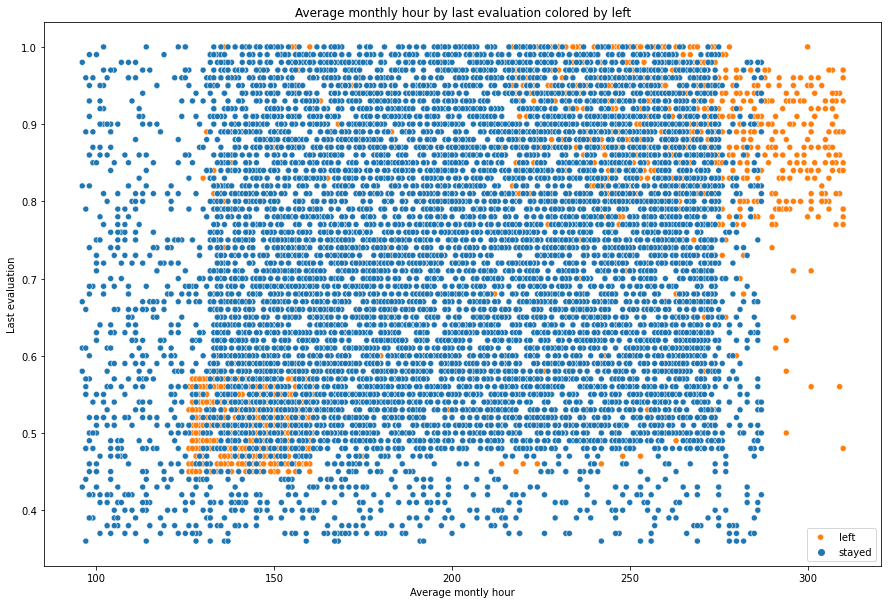

In [16]:
# Average monthly hour by last evaluation colored by left
plt.figure(figsize = (15, 10))
sns.scatterplot(x=df1['average_monthly_hour'], y=df1['last_evaluation'],
                hue=df1['left'], data=df1)
plt.title('Average monthly hour by last evaluation colored by left')
plt.xlabel('Average montly hour')
plt.ylabel('Last evaluation')
plt.legend(labels=['left', 'stayed'])
plt.show()

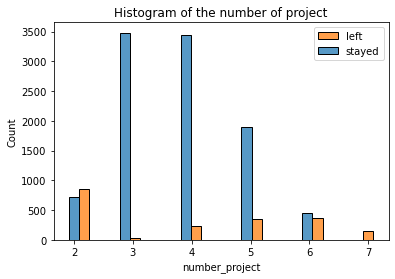

In [17]:
# Histogram of the number of project
sns.histplot(data = df1, x = df1['number_project'], hue = 'left',
            multiple= 'dodge', shrink = 2)
plt.title('Histogram of the number of project')
plt.legend(labels=['left', 'stayed'])
plt.show()

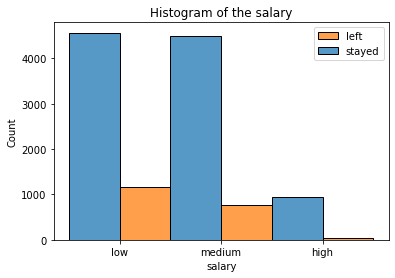

In [18]:
# Histogram of the salary
sns.histplot(data = df1, x = df1['salary'], hue = 'left',
            multiple= 'dodge', shrink = 1)
plt.title('Histogram of the salary')
plt.legend(labels=['left', 'stayed'])
plt.show()

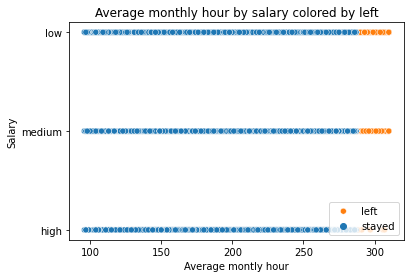

In [19]:
# Average monthly hour by salary colored by left
sns.scatterplot(x=df1['average_monthly_hour'], y=df1['salary'],
                hue=df1['left'], data=df1)
plt.title('Average monthly hour by salary colored by left')
plt.xlabel('Average montly hour')
plt.ylabel('Salary')
plt.legend(labels=['left', 'stayed'])
plt.show()

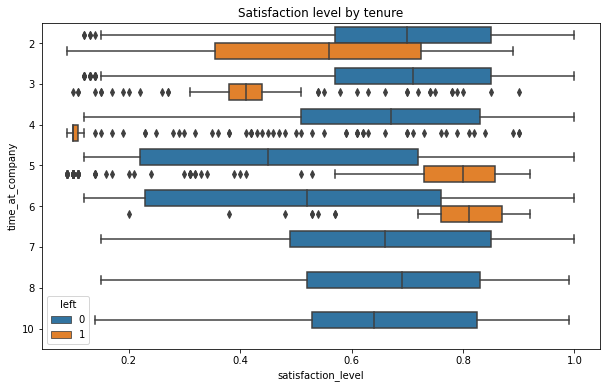

In [20]:
# Satisfaction level by tenure
plt.figure(figsize = (10, 6))


sns.boxplot(data=df1, x='satisfaction_level', y='time_at_company', hue='left', orient='h')
plt.title('Satisfaction level by tenure', fontsize='12')
plt.show()



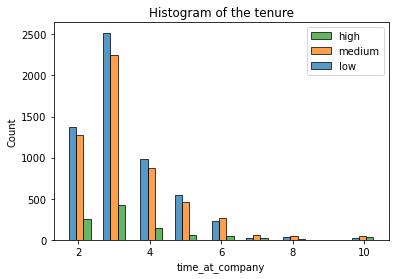

In [21]:
#Histogram of the tenure
sns.histplot(data = df1, x = df1['time_at_company'], hue = 'salary',
            multiple= 'dodge', shrink=7)
plt.title('Histogram of the tenure')
plt.legend(labels=['high', 'medium', 'low'])
plt.show()

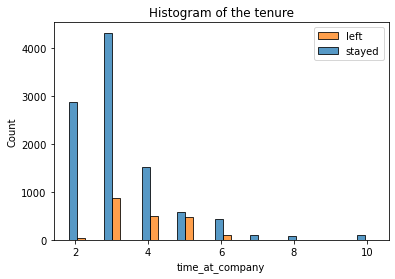

In [22]:
# Histogram of the tenure
sns.histplot(data = df1, x = df1['time_at_company'], hue = 'left',
            multiple= 'dodge', shrink=5)
plt.title('Histogram of the tenure')
plt.legend(labels=['left', 'stayed'])
plt.show()

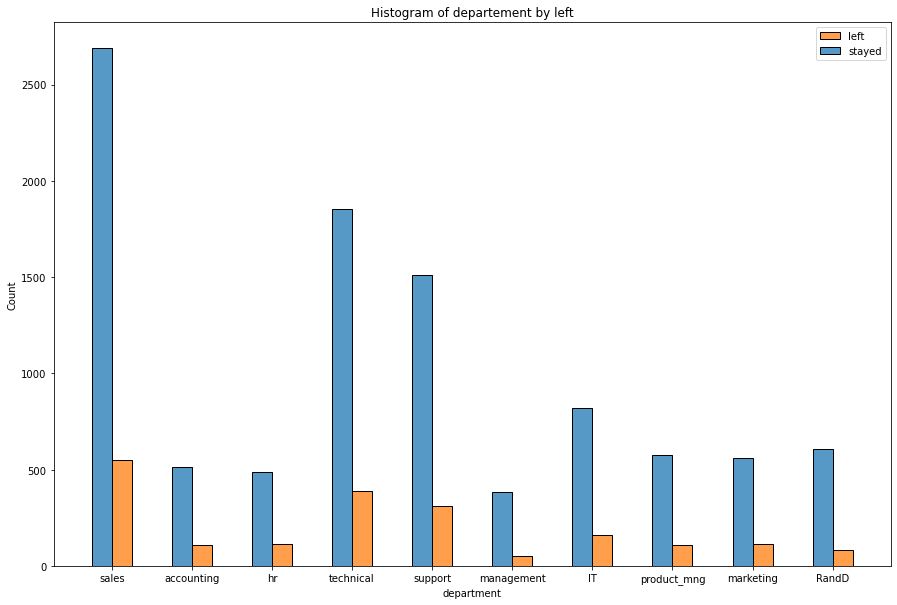

In [23]:
#Histogram of department by left
plt.figure(figsize = (15, 10))
sns.histplot(data = df1, x = df1['department'], hue = 'left',
            multiple= 'dodge', discrete =1, shrink = 0.5)


plt.title('Histogram of departement by left', fontsize = 12)
plt.legend(labels=['left', 'stayed'])
plt.show()

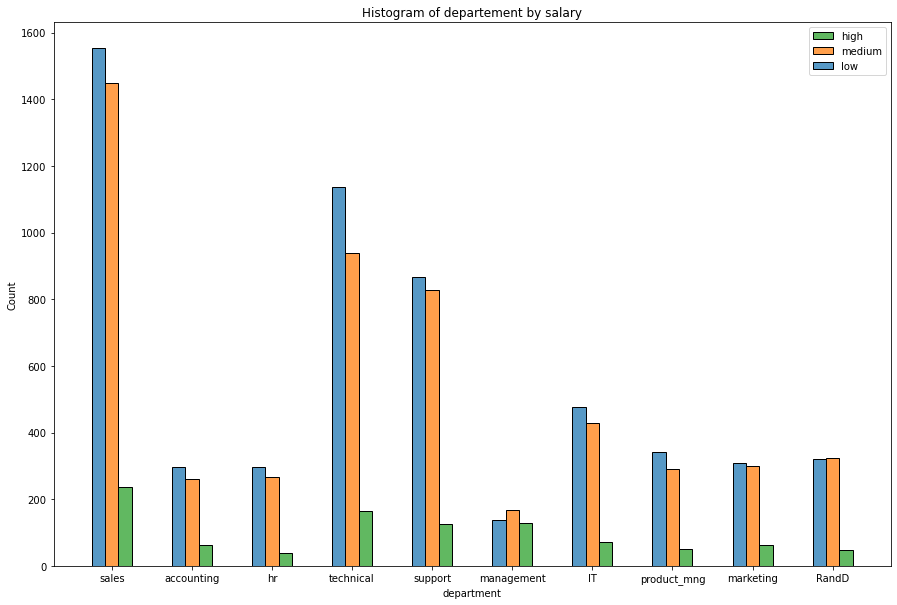

In [24]:
#Histogram of departement by salary
plt.figure(figsize = (15, 10))
sns.histplot(data = df1, x = df1['department'], hue = 'salary',
            multiple= 'dodge', discrete =1, shrink = 0.5)


plt.title('Histogram of departement by salary')
plt.legend(labels=['high', 'medium', 'low'])
plt.show()

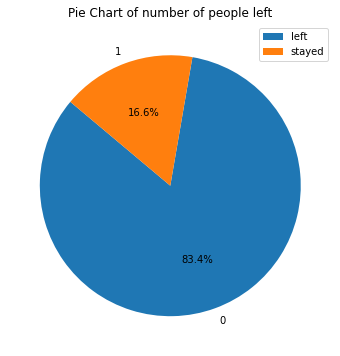

In [25]:
counts = df1['left'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of number of people left')
plt.legend(labels=['left', 'stayed'])
plt.show()

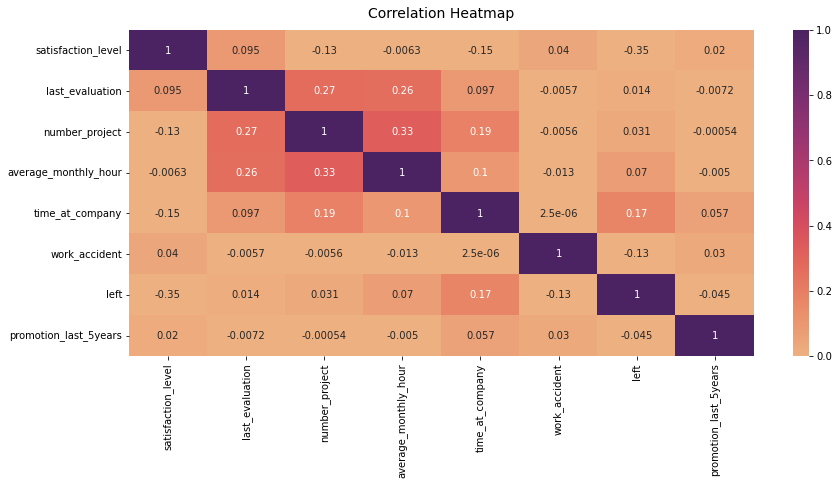

In [26]:
#Correlation Heatmap
plt.figure(figsize=(14,6))

heatmap = sns.heatmap(df1.corr(), 
                      vmin=0, vmax=1, annot=True, 
                      cmap=sns.color_palette('flare', as_cmap=True))
heatmap.set_title('Correlation Heatmap', 
                  fontdict={'fontsize':14}, pad=12);

### Insights



We have learned that the number of projects, the average monthly hour and tenure are correlated, it's could indicating potential management issues. Employee with high salary leave less the company than the others. The highest number of resignations occur between 3 and 5 years at the company. Additionally, after six years, employees seem to stay in their job.
Employee attrition is negatively corrolated with their satisfaction level, but it is corrolated with tenure.
We could conclude that it may not be rewarding work lot of hour without high evaluation score or promotion.

# paCe: Construct Stage


## Step 3. Model Building, Step 4. Results and Evaluation


We need to predict a binary outcome so we need logistic regression.

We could first use logistic regression and after random forest in order to improve the model.

### Modeling



#### Linear regression
##### Check the assumptions
    The outcome variable is categorical because we left or not the company  
    The observations are independant because each observation record the data of one person  
    We see on the heat map that there is no severe multicollinearity under the variables  
    The sample size is sufficiently large

In [27]:
#Encode the salary column
df_enc = df1.copy()

df_enc['salary'] = (df_enc['salary'].astype('category').cat.codes)

#One hot encoder to the department column
df_enc = pd.get_dummies(df_enc, drop_first = True)

df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hour,time_at_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [28]:
#Remove the outliers on the tenure column
df_log = df_enc[(df_enc['time_at_company'] >= lower_limit) & (df_enc['time_at_company'] <= upper_limit)]
df_log.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hour,time_at_company,work_accident,left,promotion_last_5years,salary,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,1,0,0,0,0,0,0,1,0,0


In [29]:
#Sample the data
y = df_log[['left']]

x = df_log.drop('left', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                   test_size = 0.3, stratify = y,
                                   random_state = 42)

In [30]:
#Construct the logistic model
clf = LogisticRegression(solver='liblinear').fit(x_train, y_train)

In [31]:
y_pred = clf.predict(x_test)

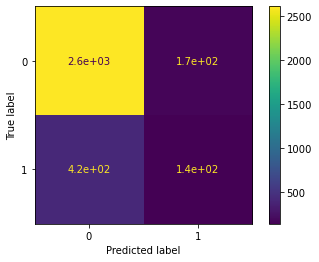

In [32]:
#Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)
disp.plot()

In [33]:
#Print the evaluation score
print('Precision score :', precision_score(y_test, y_pred))
print('Recall score :', recall_score(y_test, y_pred))
print('Accuracy :', accuracy_score(y_test, y_pred))
print('AUC score :', roc_auc_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))

Precision score : 0.44904458598726116
Recall score : 0.24955752212389382
Accuracy : 0.8218442256042973
AUC score : 0.5937306634309347
F1 score: 0.32081911262798635


In [34]:
result = {'Model': ['Logistic Regression'],
          'F1': [f1_score(y_test, y_pred)],
          'Recall': [recall_score(y_test, y_pred)],
          'Precision': [precision_score(y_test, y_pred)],
          'Accuracy': [accuracy_score(y_test, y_pred)]}
results = pd.DataFrame(result)
results

,Model,F1,Recall,Precision,Accuracy
0,Logistic Regression,0.320819,0.249558,0.449045,0.821844


We can see the model does not perform well, he perform just better than a random classifier. The precision score is 0.44 indicating that the model missies more possitive value (left) than it correctly identifies. The F1 score is also very poor. So we need to construct another predictive model. 

#### Tree-based model
##### Tuned-tree


In [35]:
#Split the data in training and test group
y = df_enc['left']

x = df_enc.drop('left', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,
                                                   stratify = y, random_state = 42)

In [36]:
#Modeling the model
tree_param = {'max_depth': [4, 6, 8, 10, None],
             'min_samples_leaf': [3, 5, 7, 9],
             'min_samples_split': [2, 4, 6, 8]}
scoring = {'accuracy', 'precision', 'recall', 'f1'}
decison_tree = DecisionTreeClassifier(random_state = 42)
dt = GridSearchCV(decison_tree, tree_param, scoring = scoring,
                  cv = 5, refit = 'f1')

In [37]:
#Fit the model
dt.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, 10, None],
                     

In [38]:
#Determine the best F1 score
dt.best_score_

0.9428821168272734

In [39]:
#Find the best parameters of the tree model
dt.best_params_

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 8}

In [40]:
def make_results (model_name, model_object):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
    Returns a pandas frames with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds. 
    '''
    cv_results = pd.DataFrame(model_object.cv_results_)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1']
                                            .idxmax(), :]
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
    table = pd.DataFrame()
    table = table.append({'Model': model_name, 'F1': f1, 'Recall': recall,
                         'Precision': precision, 'Accuracy': accuracy},
                         ignore_index = True)
    return table

In [41]:
dt_results = make_results('Decison tree', dt)
dt_results

,Model,F1,Recall,Precision,Accuracy
0,Decison tree,0.942882,0.918271,0.96902,0.981541


In [42]:
#Create the results data frame to compare the models
results = pd.concat([dt_results, results])
results.sort_values(by=['F1'], ascending = False)

,Model,F1,Recall,Precision,Accuracy
0,Decison tree,0.942882,0.918271,0.969020,0.981541
0,Logistic Regression,0.320819,0.249558,0.449045,0.821844


In [43]:
#Create the value predicted for comparing with the test value
y_pred = dt.predict(x_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

test_results = pd.DataFrame({'Model': 'Decision_Tree_test',
                             'F1': [f1],
                             'Recall': [recall],
                             'Precision': [precision], 
                             'Accuracy': [accuracy],
                            })
test_results

,Model,F1,Recall,Precision,Accuracy
0,Decision_Tree_test,0.947585,0.925703,0.970526,0.982989


In [45]:
results = pd.concat([test_results, results])
results.sort_values(by=['F1'], ascending = False)

,Model,F1,Recall,Precision,Accuracy
0,Decision_Tree_test,0.947585,0.925703,0.970526,0.982989
0,Decison tree,0.942882,0.918271,0.969020,0.981541
0,Logistic Regression,0.320819,0.249558,0.449045,0.821844


We observe that the decision tree model outerperforms the logistic regression model. The F1 score is very good with 0.942, and the other metrics are also high. The accuracy score indicates that the model correctly predicts 98% of the left value. Additionaly, the results with the test set are better.

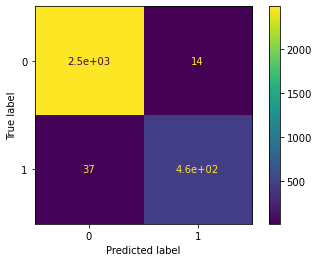

In [46]:
cm = confusion_matrix(y_test, y_pred, labels = dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = dt.classes_)
disp.plot()

The false positive and false negative are low. We have 14 false positive (categorized as leaving but the employee will stay in the company) and 37 false negatives. Therefore, the model predicts the attrition with high accuracy.

In [47]:
dt_importance = pd.DataFrame(dt.best_estimator_.feature_importances_, 
             columns=['dt_gini_importance'],
             index=x.columns).sort_values(by='dt_gini_importance',
                                          ascending=False)


feature_importance = dt_importance[:10]
feature_importance

,dt_gini_importance
satisfaction_level,0.497273
last_evaluation,0.169156
number_project,0.129500
time_at_company,0.124098
average_monthly_hour,0.077538
salary,0.000640
department_management,0.000598
department_technical,0.000498
work_accident,0.000271
department_hr,0.000144


We see the most important parameters in the prediction attrition seems to be the satisfaction level, the last evaluation, the number of project and the tenure.
Know we have these results, we are going to modeling a random forest to see if this model can deliver better predictability.

##### Random forest

In [48]:
#Set the parameters of the model
cv_params = {'max_depth': [10, 20, 30],
            'min_samples_leaf': [0.5, 0.8, 1],
            'min_samples_split': [0.001, 0.01, 0.1],
            'max_features': ['sqrt'],
             'max_samples': [0.5, 0.8, 1.3],
            'n_estimators': [50, 100, 200]}
rf = RandomForestClassifier(random_state = 42)
scoring = {'accuracy', 'precision', 'recall', 'f1'}
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring,
                     cv = 5, refit = 'f1')

In [51]:
#Fit the model
rf_cv.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [52]:
#Find the best F1 score
rf_cv.best_score_

0.9466078354049369

In [53]:
#Find the best parameters of the random forest
rf_cv.best_params_

{'max_depth': 20,
 'max_features': 'sqrt',
 'max_samples': 0.8,
 'min_samples_leaf': 1,
 'min_samples_split': 0.001,
 'n_estimators': 200}

In [54]:
rf_results = make_results('Random Forest', rf_cv)

In [55]:
results = pd.concat([rf_results, results])
results.sort_values(by=['F1'], ascending = False)

,Model,F1,Recall,Precision,Accuracy
0,Decision_Tree_test,0.947585,0.925703,0.970526,0.982989
0,Random Forest,0.946608,0.908900,0.987665,0.982987
0,Decison tree,0.942882,0.918271,0.969020,0.981541
0,Logistic Regression,0.320819,0.249558,0.449045,0.821844


The F1 score of the random forest is slightly better than that of the decision tree model. We will use the best-performing random forest model to predict the values on the test set.

In [56]:
y_pred = rf_cv.best_estimator_.predict(x_test)

In [57]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

test_rf_results = pd.DataFrame({'Model': 'Random_Forest_test',
                             'F1': [f1],
                             'Recall': [recall],
                             'Precision': [precision], 
                             'Accuracy': [accuracy],
                            })
                         
test_rf_results

,Model,F1,Recall,Precision,Accuracy
0,Random_Forest_test,0.955255,0.921687,0.991361,0.985657


In [58]:
results = pd.concat([test_rf_results, results])
results.sort_values(by=['F1'], ascending = False)

,Model,F1,Recall,Precision,Accuracy
0,Random_Forest_test,0.955255,0.921687,0.991361,0.985657
0,Decision_Tree_test,0.947585,0.925703,0.970526,0.982989
0,Random Forest,0.946608,0.908900,0.987665,0.982987
0,Decison tree,0.942882,0.918271,0.969020,0.981541
0,Logistic Regression,0.320819,0.249558,0.449045,0.821844


The random forest model performed very well on the test set, achieving an F1 score of 0.955. Also the precision socre is 2% higher than the second-best model.

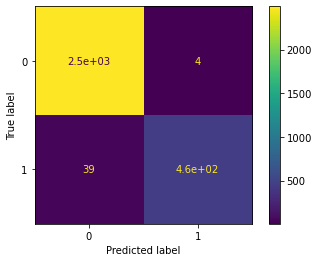

In [59]:
cm = confusion_matrix(y_test, y_pred, labels = rf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                              display_labels = rf_cv.classes_)
disp.plot()

The false positive and false negative are small. We have 4 false positive (categorized as leaving but the employee will stay in the company) and 39 false negatives. The false negative in the random forest model is small but a littl bit higher than the single decision tree, it remains low. Therefore, the model predicts the attrition with high accuracy.

In [60]:
rf_importance = pd.DataFrame(rf_cv.best_estimator_.feature_importances_,columns=['rf_gini_importance'],
             index=x.columns).sort_values(by='rf_gini_importance', ascending=False)

feature_importance = pd.concat([feature_importance,rf_importance[:10]],axis=1)

feature_importance[:5]

,dt_gini_importance,rf_gini_importance
satisfaction_level,0.497273,0.338880
last_evaluation,0.169156,0.123311
number_project,0.129500,0.191427
time_at_company,0.124098,0.173562
average_monthly_hour,0.077538,0.146946


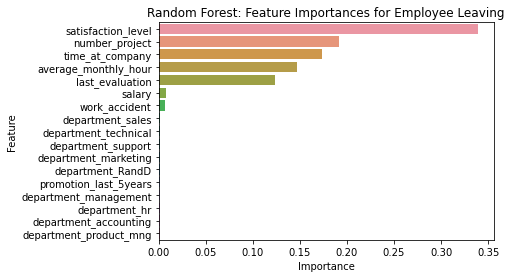

In [61]:
sns.barplot(data=rf_importance, x="rf_gini_importance", y=rf_importance.index, orient='h')
plt.title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

With the random forest model, we see the most important features in predicting attrition are the satisfaction level, the number of project, the tenure and the average monthly hour. The random forest model balances the importance of each factor better than the simple decision tree. As a result, the importance of satisfaction level is smaller, while the other features seems to be mmore significant.

# pacE: Execute Stage




## Step 4. Results and Evaluation





### Summary of model results

The logistic regression model does not perform very well, with an F1 score of 0.320 and a precision socre of 0.44. 
The single decision tree model performs well (F1 score: 0.942) but the random forest slightly outerperform with an F1 score of 0.946. Additionally, the test set shows better performance for both tree-based models. The random forest also balances the feature importances better.

### Conclusion, Recommendations, Next Steps

To conclued, we can say the models and features importances extracted from the models confirm tant one of the company's attrition problems is employees beeing overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

1. Cap the number of projects:
    We coul limit the number of projects per employees to prevent overwork, considering 3 or 4 projects per employee as a reasonable cap.
2. Promote work-life blance :
    It is important to remind managers to clarify the company's stance on the work-life balance and to avoid rewarding employees for working longer hours.
3. Promotion based on tenure :
    The company should consider promoting employees who have worked for more than three years.
4. Revise evaluation criteria : 
    Hifh evaluation scores should not be reserved for employees who work more than 200 hour per month. Instead, it is important to modify how employees are evaluated, focusing mmore on their contribution rather than the number of hours worked.
5. Enhance company culture : Improving the overall company culture regarding working hours is crucial to improve attrition.


For the next step, it's important to consider reperform this type of analysis without the last evaluation and the satisfaction level columns. We have concern about data leakage for these two columns. First it is possible that these types of evaluations don't be performed frequently, and it is also possible people who plan to leave the company have poorer score than the others. Therefore, it would be beneficial to predict attrition without this two features.
We also could perform other analyses like k-means model and analyze the clusters to gain further insights.